# ニューラルネットワーク
### シグモイド関数

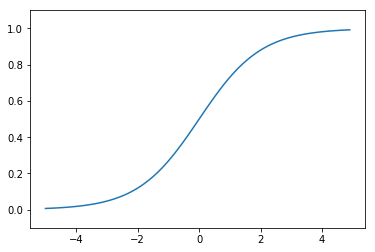

In [6]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

### ステップ関数

In [1]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
print(x)
y = x > 0
print(y)
print(y.astype(np.int))

[-1.  1.  2.]
[False  True  True]
[0 1 1]


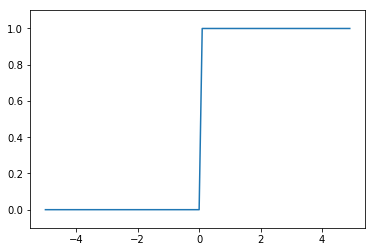

In [5]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

def step_function(x):
    return np.array(x > 0, dtype=np.int)

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # 図で描画するy軸の範囲を指定
plt.show()

### シグモイド関数とステップ関数の比較

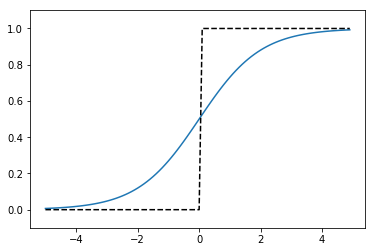

In [13]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) #図で描画するy軸の範囲を指定
plt.show()

### ReLU (Rectified Linear Unit) 関数

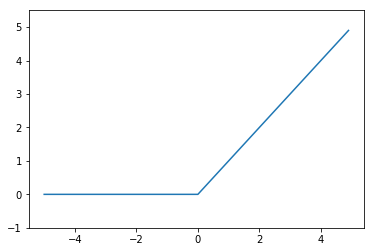

In [9]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

### 多次元配列の計算（行列の内積）

In [2]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [3]:
import numpy as np
B = np.array([[1,2], [3, 4], [5,6]])
print(B)
print(np.ndim(B))
print(B.shape)
print(B.shape[0])

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)
3


In [4]:
import numpy as np
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])
print(np.dot(A, B))
print(np.dot(B, A))

[[19 22]
 [43 50]]
[[23 34]
 [31 46]]


In [5]:
import numpy as np
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4], [5, 6]])
print(np.dot(A, B))
print(np.dot(B, A))

[[22 28]
 [49 64]]
[[ 9 12 15]
 [19 26 33]
 [29 40 51]]


### ニューラルネットワークの内積

In [6]:
X = np.array([1,2])
W = np.array([[1,3, 5], [2, 4, 6]])
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


### ３層ニューラルネットワークの実装

In [10]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

In [11]:
A1 = np.dot(X, W1) + B1
print(A1)

[ 0.3  0.7  1.1]


In [14]:
Z1 = sigmoid(A1)
print(Z1)

[ 0.57444252  0.66818777  0.75026011]


In [15]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

In [17]:
A2 = np.dot(Z1, W2) + B2
print(A2)

[ 0.51615984  1.21402696]


In [18]:
Z2 = sigmoid(A2)
print(Z2)

[ 0.62624937  0.7710107 ]


In [19]:
# 恒等関数
def identity_function(x):
    return x

In [20]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

In [21]:
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(A3)
print(Y)

[ 0.31682708  0.69627909]
[ 0.31682708  0.69627909]


### 実装のまとめ

In [22]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

In [23]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

In [24]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[ 0.31682708  0.69627909]


### ソフトマックス関数

In [25]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)
y = exp_a / sum_exp_a
print(y)

[  1.34985881  18.17414537  54.59815003]
74.1221542102
[ 0.01821127  0.24519181  0.73659691]


In [26]:
# 少し問題のあるソフトマックス関数
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [27]:
# 少し問題のあるソフトマックス関数は大きな数字を扱えない
softmax(np.array([1010, 1000, 990]))

/Users/kot/miniconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/Users/kot/miniconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide


array([ nan,  nan,  nan])

In [28]:
# 改良したソフトマックス関数
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [29]:
# 改良したソフトマックス関数は大きな数も扱える
softmax(np.array([1010, 1000, 990]))

array([  9.99954600e-01,   4.53978686e-05,   2.06106005e-09])

In [31]:
# ソフトマックス関数の特徴として、その和は必ず1になるので、確率として扱える。
np.sum(softmax(np.array([1010, 1000, 990])))

1.0

## 手書き数字認識
### MNIST データセット

In [20]:
# MNIST データセットの読み込み。
# 初めて使う場合はネットからデータをダウンロードするので数分かかる。
# 二度目以降はダウンロード済みのデータを使う。
# coding: utf-8
import sys, os
import numpy as np
from mymodule.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 形状を元の画像サイズに変形
print(img.shape)  # (28, 28)

img_show(img)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
5
(784,)
(28, 28)


### ニューラルネットワークの推論処理

In [18]:
# coding: utf-8
import sys, os
sys.path.append("mymodule")  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from mymodule.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


### バッチ処理

In [19]:
# coding: utf-8
import sys, os
sys.path.append("mymodule")  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from mymodule.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = 100 # バッチの数
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
